## EDA for Segmentation dataset

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Paths for images and labels

In [4]:
IMAGES_TYPE = "training"
# IMAGES_TYPE = "validation" # uncomment this to visualize validation images

DATASET_BASE_DIR = os.getcwd()
IMG_BASE_DIR = os.path.join(DATASET_BASE_DIR, IMAGES_TYPE, "images")
LABEL_BASE_DIR = os.path.join(DATASET_BASE_DIR, IMAGES_TYPE, "labels")

In [5]:
# there are labels and images with exact same file names

img_files = os.listdir(IMG_BASE_DIR)
img_files.sort()

label_files = os.listdir(LABEL_BASE_DIR)
label_files.sort()

img_paths = [os.path.join(IMG_BASE_DIR, path) for path in img_files]
label_paths = [os.path.join(LABEL_BASE_DIR, path) for path in label_files]

# removing the .DS_Store files if they exist
img_paths = list(filter(lambda path: path.split("/")[-1] != ".DS_Store", img_paths))
label_paths = list(filter(lambda path: path.split("/")[-1] != ".DS_Store", label_paths))

### Visualizing the Annotated Images (This takes a few seconds)

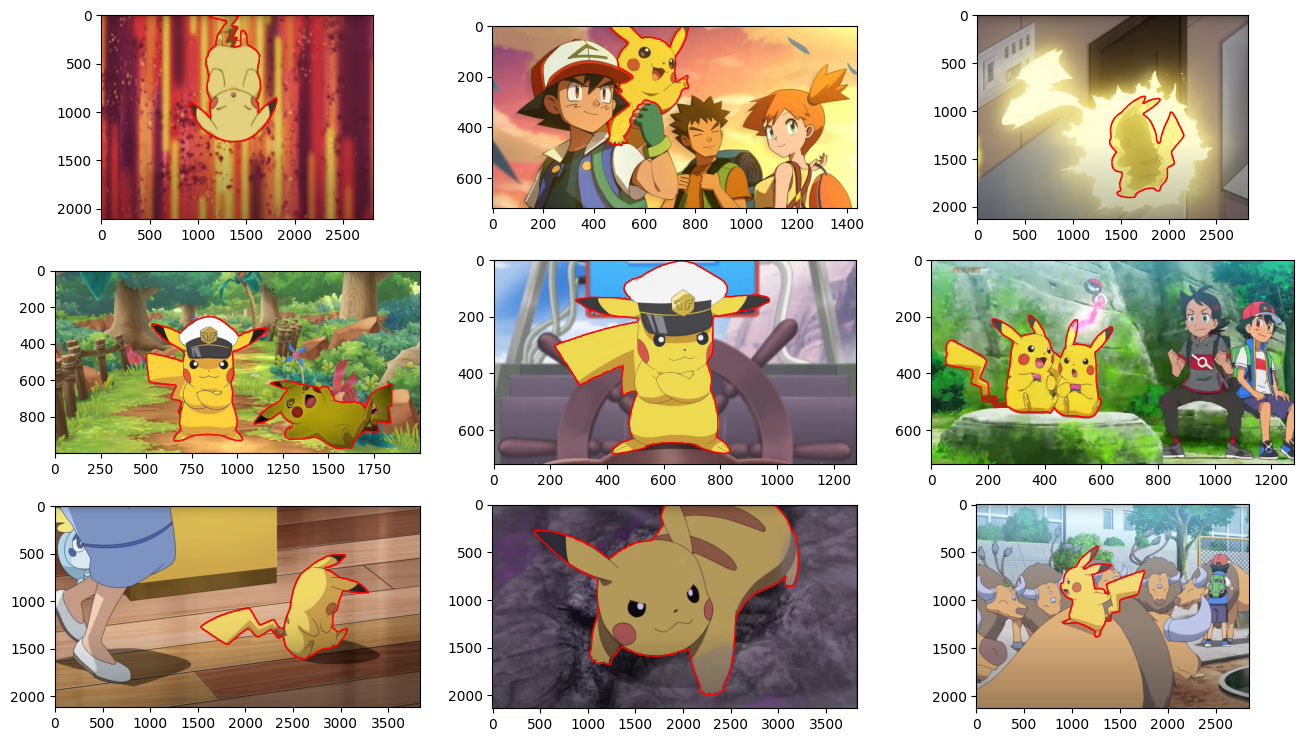

In [27]:
fig = plt.figure(figsize=(16, 9))
plt.axis('off')

rows = 3
cols = 3

for plot_idx in range(1, cols * rows + 1):
    fig.add_subplot(3, 3, plot_idx)
    ax = plt.subplot(3, 3, plot_idx)
    
    img_idx = np.random.randint(len(img_paths), size=1)[0] # random index
    
    img = cv2.imread(img_paths[img_idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    height, width, _ = img.shape

    # ignoring the class at 0th index since there is only one class
    with open(label_paths[img_idx], "r") as file:
        for line in file:
            seg_data = line.split()

            # starting from index 1 since 0th index has class and we have only 1 class which is pikachu
            polygon = [float(coord) for coord in seg_data[1:]]

            # since YOLO format is in normalized form, converting it to pixels by multiplying by width and height of the image
            # data is in format [x1 y1 x2 y2 x3 y3 ....]
            polygon = [coord * width if idx % 2 == 0 else coord * height for idx, coord in enumerate(polygon)]

            # converting into a list of (x, y) tuples
            it = iter(polygon)
            polygon = list(zip(it, it))

            patch = patches.Polygon(polygon, closed=True, edgecolor="r", fill=False)
            ax.add_patch(patch)
    
    
    plt.imshow(img)

plt.show()